# 分析文本数据

> *主要任务包括下载网页内容、解析网页内容、查词频、获取关键词、画词云图、打印关键词


In [1]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## 第一步: 获取数据

使用`requests` 库请求网页数据

In [2]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Machine learning - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-

## Step 2: 数据解析

从HTML文件中解析文本内容

很多工具可以进行数据解析，如beautifulsoup，HTMLParser等， 这里使用[HTMLParser](https://docs.python.org/3/library/html.parser.html) 解析网页内容. 定义类，从HTML代码解析除了`<script>` and `<style>` 标签之外的包含文本的标签中解析文本，

In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Search Search Appearance Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 History 2 Relationships to other fields Toggle Relationships to other fields subsection 2.1 Artificial intelligence 2.2 Data compression 2.3 Data mining 2.4 Generalization 2.5 Statistics 2.6 Statistical physics 3 Theory 4 Approaches Toggle Approaches subsection 4.1 Supervised learning 4.2 Unsupervised learning 4.3 Semi-supervised learning 4.4 Reinforcement learning 4.5 Dimensionality reduction 4.6 Other types 4.6.1 Self-learning 4.6.2 Feature learning 4.6.3 Sparse dictionary learning 4.6.4 Anomaly detection 4.6.5 Robot learning 4.6.6 Associatio

## Step 3: 内容分析

英文文本关键词提取可以用RAKE，中文文本关键词提取可以用Jieba。

这里使用 [RAKE](https://github.com/aneesha/RAKE) 抽取关键词. 如果工具包不存在，需要先安装。

In [4]:
import sys
!{sys.executable} -m pip install nlp_rake

Looking in indexes: https://mirrors.aliyun.com/pypi/simple


使用Rake对象，限定关键词包含不少于5个字符，在文档中出现的频次不低于3，关键词的长度不能超过2个单词。

In [5]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('main article', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('gaussian processes', 4.0),
 ('algorithmic bias', 4.0),
 ('language corpora', 4.0),
 ('prentice hall', 4.0),
 ('mit press', 4.0),
 ('wayback machine', 3.981132075471698),
 ('artificial neuron', 3.96875),
 ('retrieved 2018-11-25', 3.9655172413793105),
 ('retrieved 2018-08-20', 3.9655172413793105),
 ('statistical learning', 3.9493670886075947),
 ('feature learning', 3.9493670886075947),
 ('reinforcement learning', 3.9493670886075947),
 ('deep learning', 3.9493670886075947),
 ('machine learning', 3.930499164079293),
 ('neural networks', 3.888888888888889),
 ('artificial intelligence', 3.88875),
 ('supervised learning', 3.8660337552742616),
 ('speech recognition', 3.857142857142857),
 ('bayesian network', 3.857142857142857),
 ('pattern recognition', 3.8461538461538463),
 ('statistical physics', 3.833333


以上结果可以看出文本中的最重要的若干关键词信息。

## Step 4: 结果可视化

使用matplotlib的柱状图可视化关键词的重要性。

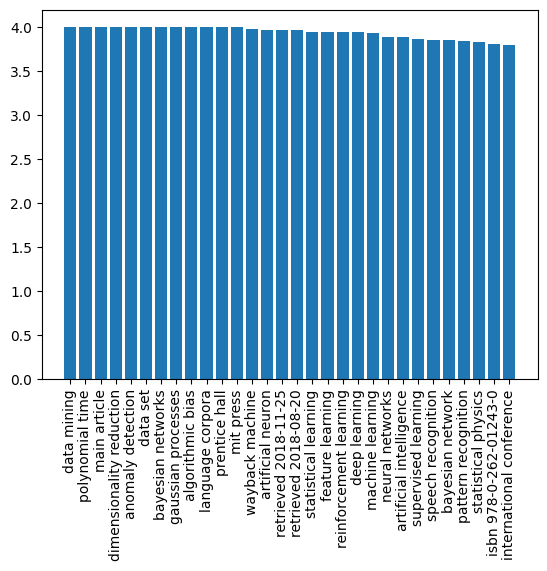

In [7]:
import matplotlib.pyplot as plt
plt.style.use('default')

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

统计词频，使用wordcloud画词云图。

In [8]:
!{sys.executable} -m pip install wordcloud

Looking in indexes: https://mirrors.aliyun.com/pypi/simple


`WordCloud` 可以接收文本字符串作为输入，也可以接收词频list作为输入, 返回图片, 以`matplotlib`作为显示引擎:

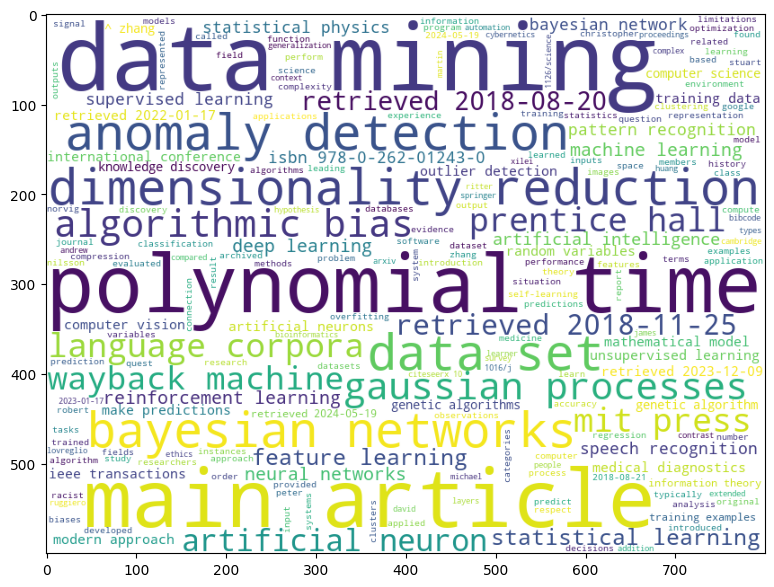

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

原始文本作为输入使用 `WordCloud` 画图：

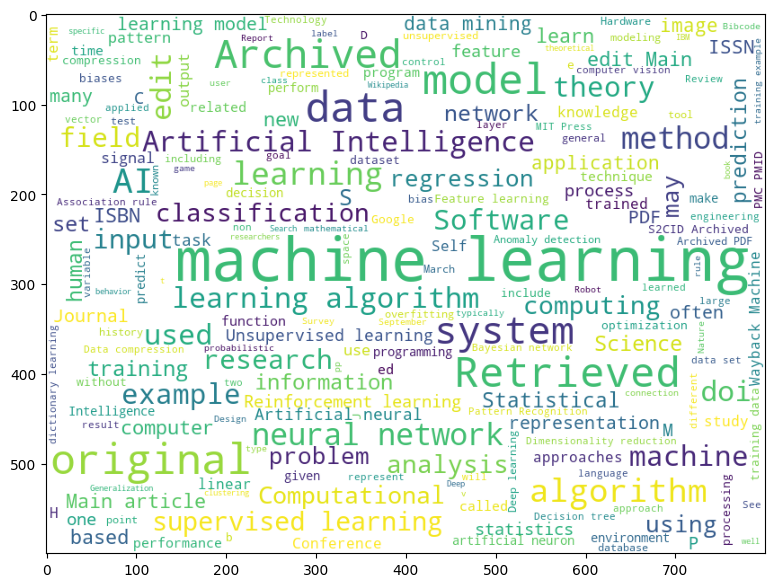

In [10]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

将图片保存到本地

In [12]:
wc.generate(text).to_file('ds_wordcloud.png')